In [64]:

import pandas as pd
import json

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
import plotly.express as px

import numpy as np
import scipy.stats as stats


import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress

'''
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
'''


'\nfrom sklearn.linear_model import ElasticNet\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.metrics import r2_score\n'

In [10]:
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
to_drop = data.columns[:2]
data = data.drop(columns = to_drop)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
def missing(dataframe, cols_nulls):

  '''
  Returns a dataframe where the missing values are replaced
  by 0 (1 if there arent any null value).
  '''
  
  df = dataframe.copy()
  df[cols_nulls] = df[cols_nulls].notnull().astype(int)

  return df 

# Understanding and Exploring the Data

The following portion of this notebook is mostly about **inspecting** the nature of our data, to decide if it is necessary to run some **cleaning**.

The **results** from the inspection were the following ...

*   First, there's an ID column that doesn't seem to add any value to our data, so it has been decided that this column should be removed.

*   Excluding the ID column, we have 80 variables in our data from which we are looking to explain the variable: SalePrice (our dependent feature).

*   There are 19 columns with null values, the columns that are at the top are: (PoolQC, 1453), (MiscFeature, 1406), (Alley, 1369), (Fence, 1179), and (FireplaceQu, 690).

*   After plotting the columns with missing volumns, we can see clearly that each one of them is relevant to our dependent feature; having doubts only over columns [Fence, Alley, MiscFeature, MasVnrArea, MasVnrType].

*   There are There are 38 numerical variables, 43 categorical variables and 4 time-related variables (included in numerical variables), giving us a total of 81 variables.


In [14]:
# Getting a summary about the data found in each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
# Getting the number of null values for each column.
nulls = data.isnull().sum()
nulls = nulls[nulls > 1].sort_values(ascending = False)
print(nulls, '\n')
print(f'There are {len(nulls)} columns with nulls values' )

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
dtype: int64 

There are 18 columns with nulls values


In [16]:
# To have a better grasp about the above, we are going to translate the past results as percentages
nulls_lst = nulls.index.values.tolist()
for null in nulls_lst:
  print(null, round(data[null].isnull().mean()* 100, 3), '% are missing values.')

PoolQC 99.521 % are missing values.
MiscFeature 96.301 % are missing values.
Alley 93.767 % are missing values.
Fence 80.753 % are missing values.
FireplaceQu 47.26 % are missing values.
LotFrontage 17.74 % are missing values.
GarageYrBlt 5.548 % are missing values.
GarageType 5.548 % are missing values.
GarageFinish 5.548 % are missing values.
GarageQual 5.548 % are missing values.
GarageCond 5.548 % are missing values.
BsmtExposure 2.603 % are missing values.
BsmtFinType2 2.603 % are missing values.
BsmtFinType1 2.534 % are missing values.
BsmtCond 2.534 % are missing values.
BsmtQual 2.534 % are missing values.
MasVnrArea 0.548 % are missing values.
MasVnrType 0.548 % are missing values.


In [17]:
# Getting the unique values for each column, to understand better what each col represents
for col in list(data.columns):
  print(f"""{col}
{data[col].value_counts().sort_index()}
-----------------------------------------
  """)

MSSubClass
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64
-----------------------------------------
  
MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: MSZoning, dtype: int64
-----------------------------------------
  
LotFrontage
21.0     23
24.0     19
30.0      6
32.0      5
33.0      1
         ..
160.0     1
168.0     1
174.0     2
182.0     1
313.0     2
Name: LotFrontage, Length: 110, dtype: int64
-----------------------------------------
  
LotArea
1300      1
1477      1
1491      1
1526      1
1533      2
         ..
70761     1
115149    1
159000    1
164660    1
215245    1
Name: LotArea, Length: 1073, dtype: int64
-----------------------------------------
  
Street
Grvl       6
Pave    1454
Name: Street, dtype: int64
-----------------------------------------
  
Alley
Grvl    50
Pa

In [18]:
# Considering the amount of Missing Values that we got, it would be necessary 
# to understand if these values have some relationship with our dependent feature
# SalePrice, for this reason we proceed to plot the relationship ...

df_missing = missing(data, nulls_lst)
df_missing.info()

# Now all cols with missing values are filled.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   int32 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          1460 non-null   int32 
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [19]:
# In the following spaces we present some graphs that seek to help us visualize the missing values
# and its relationship with SalePrice

for null in nulls_lst:
  grouped = df_missing.groupby(null, as_index = False).agg({'SalePrice':'median'})
  viz = px.bar(grouped, null, 'SalePrice', color = null, title = null, template = 'plotly_dark', height = 400)
  viz.show()
  print()


In [20]:
# From all the variables present in our dataset, we're going to review the different 
# kinds that we have ...

numerical = [col for col in data.columns if data[col].dtypes != 'O']
categorical = [col for col in data.columns if data[col].dtypes == 'O']
time = [col for col in numerical if 'Yr' in col or 'Year' in col]

print(f'''
NUMERICAL
{numerical}
There are {len(numerical)} numerical variables.

CATEGORICAL
{categorical}
There are {len(categorical)} numerical variables

TIME
{time}
There are {len(time)} numerical variables
''')



NUMERICAL
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
There are 37 numerical variables.

CATEGORICAL
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional'

In [21]:
data[numerical]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [22]:
data[categorical]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
data[time]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


# Analysis

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [26]:
data = data.drop(columns= ['Alley'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [27]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## CORRELATION

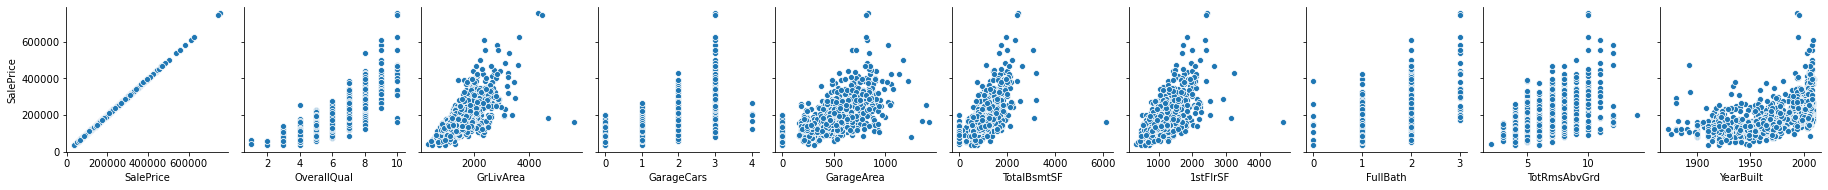

In [38]:

import matplotlib.pyplot as py
import seaborn as sns

correlation = data.corr()
features = correlation['SalePrice'].sort_values(ascending=False)

sns.pairplot(data = data, y_vars=['SalePrice'], x_vars = features.index[:10]) 
  
plt.show()


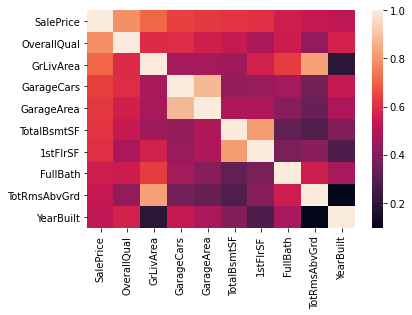

In [43]:
top_fts = features.index[:10]
data_fts = data[top_fts]
sns.heatmap(data_fts.corr())

## Hypothesis Testing

In [52]:

def generate_means(data): 
    
    means = []
    for i in range(1000): 
        samples = np.random.choice(data, 50, replace = True)
        means.append(samples.mean())
    
    return means


In [56]:
data_fts.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808
std,79442.502883,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000
25%,129975.000000,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000
50%,163000.000000,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000
75%,214000.000000,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000


In [70]:

houses = data['SalePrice']
high_grliv = data['SalePrice'][data['GrLivArea'] > 1500]
low_grliv = data['SalePrice'][data['GrLivArea'] <= 1500]
# above ground (grade) living area 

means_houses = generate_means(houses)
means_high = generate_means(high_grliv)
means_low = generate_means(low_grliv)

print(f'''
MEAN SALE PRICE OF ALL HOUSES --> {np.mean(means_houses)}
MEAN SALE PRICE OF ALL HOUSES with an AGLA above 1500 --> {np.mean(means_high)}
MEAN SALE PRICE OF ALL HOUSES with an AGLA below 1500  --> {np.mean(means_low)}
''')



MEAN SALE PRICE OF ALL HOUSES --> 180758.30842000002
MEAN SALE PRICE OF ALL HOUSES with an AGLA above 1500 --> 229234.18451999998
MEAN SALE PRICE OF ALL HOUSES with an AGLA below 1500  --> 139289.1191



In [81]:
t, p = stats.ttest_1samp(high_grliv, houses)
p = np.mean(p) 
print(p) # SE RECHAZA HIPOTESIS NULA DONDE SE INDICA QUE EL AGLA INFLUYE EN EL PRECIO DE UNA CASA

0.01676367064000079


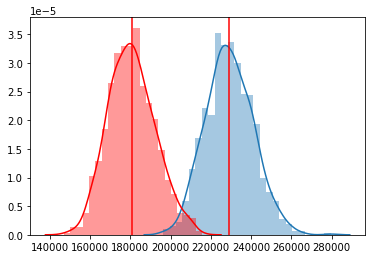

In [83]:
sns.distplot(means_high, hist= True, kde=True)
sns.distplot(means_houses, hist= True, kde=True, color ='red')
plt.axvline(np.mean(means_high),color='r')
plt.axvline(np.mean(means_houses),color='r')
plt.show()

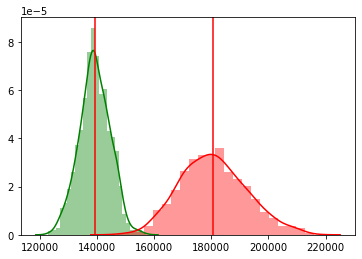

In [85]:
sns.distplot(means_low, hist= True, kde=True, color='green')
sns.distplot(means_houses, hist= True, kde=True, color ='red')
plt.axvline(np.mean(means_low),color='r')
plt.axvline(np.mean(means_houses),color='r')
plt.show()

## Prediccion Lineal

In [86]:
import plotly.express as px

In [87]:
x = data_fts['SalePrice']
y = data_fts['OverallQual']
model = px.scatter(data_fts, x = x, y = y, trendline='ols')
model.show()

In [88]:
results = px.get_trendline_results(model)
results = results.iloc[0]["px_fit_results"].summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          2.19e-313
Time:                        22:48:03   Log-Likelihood:                -1827.3
No. Observations:                1460   AIC:                             3659.
Df Residuals:                    1458   BIC:                             3669.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6080      0.055     65.462      0.0

In [89]:
data_fts['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [91]:
slope, intercept, rvalue, pvalue, stderr = linregress(data_fts['OverallQual'], data_fts['SalePrice'])
predictions = data_fts.copy()[['OverallQual', 'SalePrice']]
predictions['prediction'] = [val*slope + intercept for val in predictions['OverallQual']]
predictions

,OverallQual,SalePrice,prediction
0,7,208500,221844.538637
1,6,181500,176408.736044
2,7,223500,221844.538637
3,7,140000,221844.538637
4,8,250000,267280.341230
...,...,...,...
1455,6,175000,176408.736044
1456,6,210000,176408.736044
1457,7,266500,221844.538637
1458,5,142125,130972.933451


In [93]:
mod_pred = px.scatter(predictions, x = 'OverallQual', y = ['prediction', 'SalePrice'], trendline = 'ols')
mod_pred.show()